In [ ]:
# -*- coding: utf-8 -*-
"""task 3 CodeAlpha

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/1bLXJQlN7NsSMMqJg3hSqXBqLDK1ZmvkG
"""

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

data = pd.read_csv("housing.csv")

data.info()

# Drop rows with missing values
data.dropna(inplace=True)

data.info()

# Install scikit-learn if not installed already
!pip install -U scikit-learn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64


In [ ]:
# Splitting the data into features (X) and target variable (y)
X = data.drop(['median_house_value'], axis=1)
y = data['median_house_value']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=49)

# Handling missing values and preprocessing

# Log transformation of numerical features
numeric_cols = ['total_rooms', 'total_bedrooms', 'population', 'households']
X_train[numeric_cols] = np.log1p(X_train[numeric_cols])
X_test[numeric_cols] = np.log1p(X_test[numeric_cols])

# One-hot encoding for categorical feature 'ocean_proximity'
X_train = pd.get_dummies(X_train, columns=['ocean_proximity'], prefix='ocean')
X_test = pd.get_dummies(X_test, columns=['ocean_proximity'], prefix='ocean')



In [ ]:
# Standardizing numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[numeric_cols])
X_test_scaled = scaler.transform(X_test[numeric_cols])
X_train.loc[:, numeric_cols] = X_train_scaled
X_test.loc[:, numeric_cols] = X_test_scaled




<Axes: >

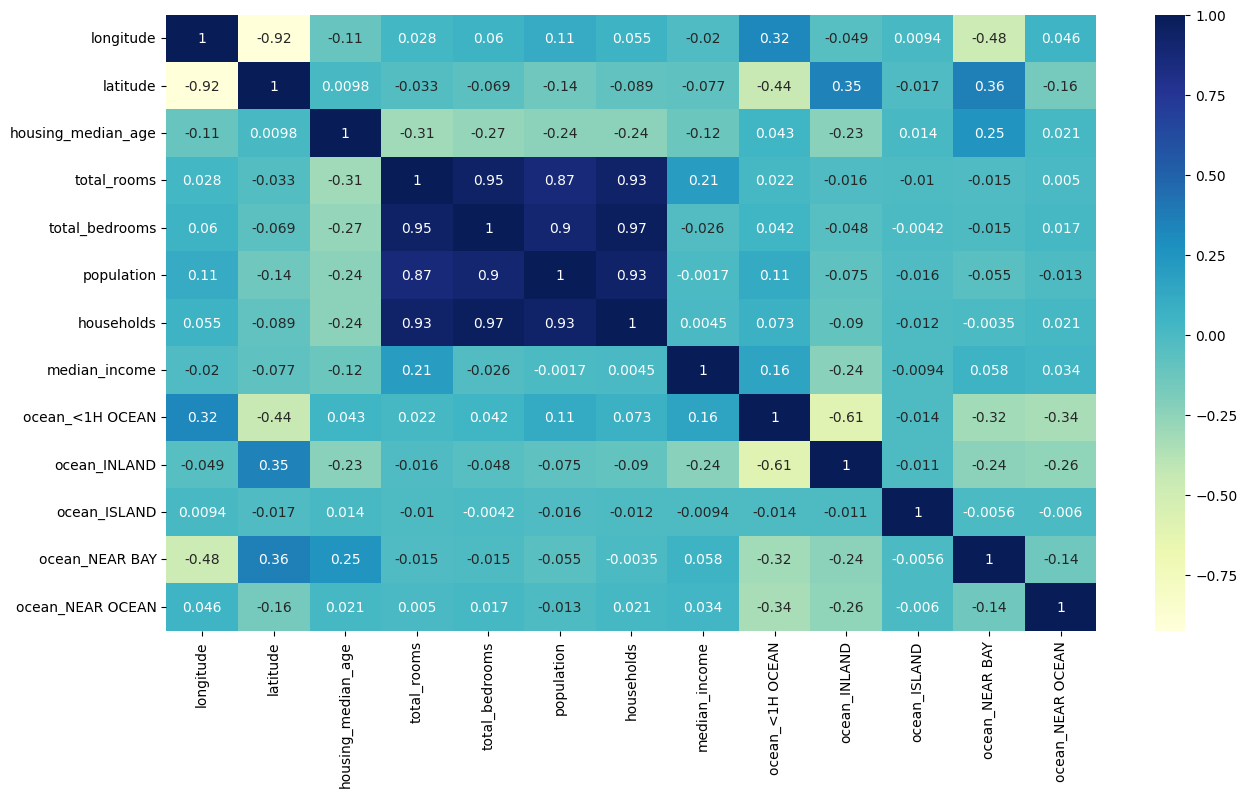

In [ ]:
# Visualizing the data
plt.figure(figsize=(15, 8))
sns.heatmap(X_train.corr(), annot=True, cmap="YlGnBu")



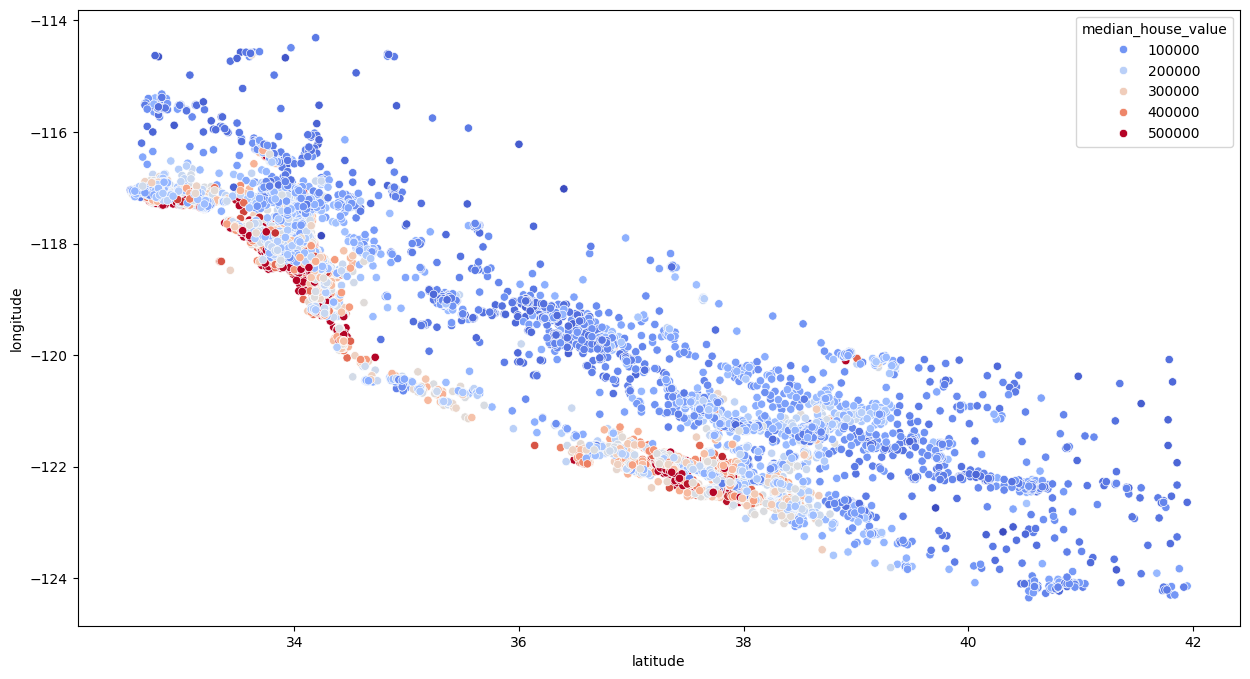

In [ ]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x='latitude', y='longitude', data=X_train, hue=y_train, palette='coolwarm')

# Feature engineering
X_train['bedroom_ratio'] = X_train['total_bedrooms'] / X_train['total_rooms']
X_train['household_rooms'] = X_train['total_rooms'] / X_train['households']

X_test['bedroom_ratio'] = X_test['total_bedrooms'] / X_test['total_rooms']
X_test['household_rooms'] = X_test['total_rooms'] / X_test['households']



In [ ]:
# Training the model
reg = LinearRegression()
reg.fit(X_train, y_train)

# Evaluating the model
y_pred = reg.predict(X_test)
r2_score(y_test, y_pred)

0.6789887803308337

In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()  # Change to regressor instead of classifier
forest.fit(X_train, y_train)
accuracy = forest.score(X_test, y_test)
print("Random Forest Accuracy:", accuracy)


Random Forest Accuracy: 0.8200874967032039


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid={
    "n_estimators":[3,10,30],
    "max_features":[2,4,6,8]
}
grid_search=GridSearchCV(forest,param_grid,cv=5,scoring="neg_mean_squared_error",
                         return_train_score=True)


grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [2, 4, 6, 8],
                         'n_estimators': [3, 10, 30]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
best_forest=grid_search.best_estimator_

In [ ]:
best_forest.score(X_test, y_test)

0.8163038750539099